In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [7]:
IMAGE_SIZE = [224, 224]

train_path = 'D:/thesis_work/images/training'
valid_path = 'D:/thesis_work/images/testing'

In [8]:
from tensorflow.keras.applications import InceptionV3

inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inceptionv3.layers:
    layer.trainable = False

In [9]:
x = Flatten()(inceptionv3 .output)

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import InceptionV3

inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inceptionv3.layers:
    layer.trainable = False

x = Flatten()(inceptionv3.output)
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inceptionv3.input, outputs=prediction)

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')


Found 8845 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


Epoch 1/50
139/139 [==============================] - 84s 600ms/step - loss: 0.8252 - accuracy: 0.5000 - val_loss: 0.8667 - val_accuracy: 0.5000
Epoch 2/50
139/139 [==============================] - 49s 355ms/step - loss: 0.8457 - accuracy: 0.5000 - val_loss: 0.9508 - val_accuracy: 0.5000
Epoch 3/50
139/139 [==============================] - 49s 355ms/step - loss: 0.9502 - accuracy: 0.5000 - val_loss: 0.7486 - val_accuracy: 0.5000
Epoch 4/50
139/139 [==============================] - 50s 360ms/step - loss: 0.8205 - accuracy: 0.5000 - val_loss: 0.7310 - val_accuracy: 0.5000
Epoch 5/50
139/139 [==============================] - 50s 359ms/step - loss: 0.8114 - accuracy: 0.5000 - val_loss: 0.8113 - val_accuracy: 0.5000
Epoch 6/50
139/139 [==============================] - 55s 393ms/step - loss: 0.8591 - accuracy: 0.5000 - val_loss: 0.7727 - val_accuracy: 0.5000
Epoch 7/50
139/139 [==============================] - 68s 491ms/step - loss: 0.8335 - accuracy: 0.5000 - val_loss: 0.7597 - val_ac

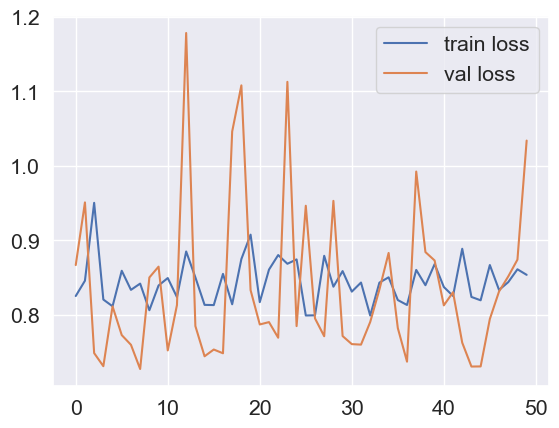

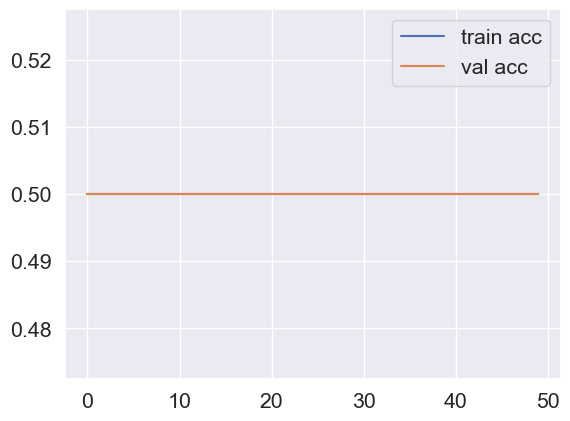

10/10 [==============================] - 1s 59ms/step
Confusion Matrix:
[[  4 356]
 [  1 239]]


<Figure size 640x480 with 0 Axes>

In [15]:

r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have test data and ground truth labels
y_true = test_set.classes  # Ground truth labels
y_pred_probs = model.predict(test_set)  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)  # Convert probabilities to binary predictions

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

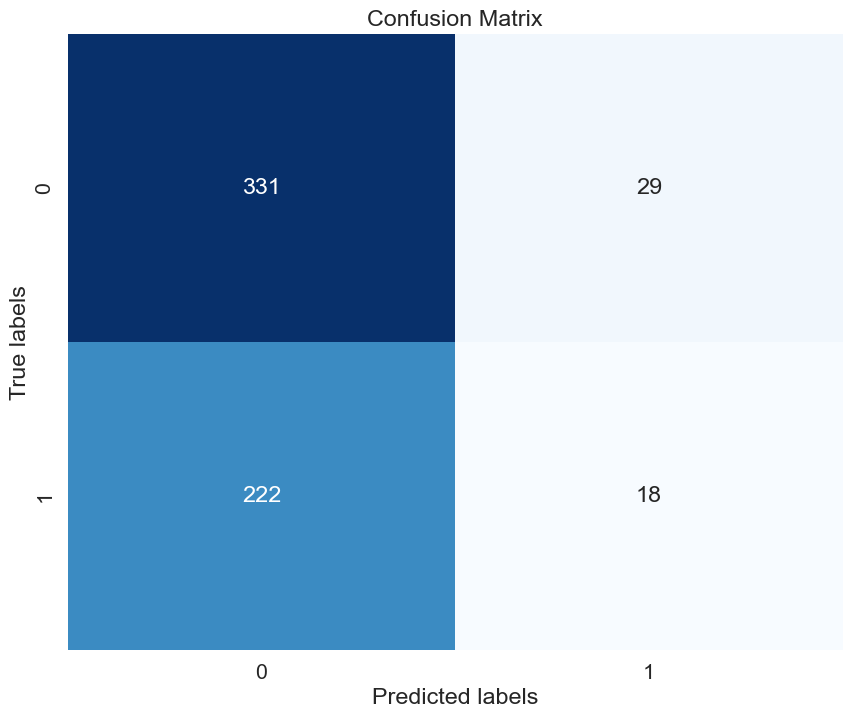

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')  # Save the confusion matrix as a PNG file
plt.show()

In [14]:
import tensorflow as tf
model_path = 'model/inceptionv3.h5'

# Save the model in .h5 format
tf.keras.models.save_model(model, model_path, save_format='h5')